In [1]:
from Binaries import *

Hardware = HardwareClassifier()
Hardware.load_and_print_performance("full_random_traces_downsampled_vem_1.000")

print()

for model in os.listdir("/cr/data01/filip/models/"):
    if model in ["ENSEMBLES", "NaiveBayesClassifier", "HardwareClassifier"]: continue       # these aren't trainable
    elif "Normed" in model: continue                                                        # normed layers don't work
    elif "LargeNetwork" in model: continue                                                  # large network smears predictions to random choice
    elif "LSTM" in model: continue                                                          # don't have this set up fully yet

    dataset = "validation_data" if model.split("_")[2] == "FullBandwidth" else "all_energies"
    if dataset == "validation_data" and model.split("_")[-1] != "NoCuts": dataset += "_no_cuts"
    _ = NNClassifier(model, supress_print = True).load_and_print_performance(dataset)


Classifier                                    Dataset                                  TP      FP      TN      FN
HardwareClassifier                            full_random_traces_downsampled_vem_1.000  176394       0       0 1827324 -> ACC =   8.80%

120_TwoLayer_FullBandwidth_NoCuts             validation_data                       83858       0       0   17609 -> ACC =  82.65%
120_OneLargeLayer_HighEnergy_1Muon            all_energies                         280183       0       0 1614532 -> ACC =  14.79%
120_OneLayer_FullBandwidth_NoCuts             validation_data                       99079       0       0   27429 -> ACC =  78.32%
120_OneLayer_FullBandwidth_1Particle          validation_data_no_cuts               96381       0       0  181283 -> ACC =  34.71%
120_OneLayer_FullBandwidth_2VEM               validation_data_no_cuts               39679       0       0  801224 -> ACC =   4.72%
120_OneLayer_FullBandwidth_2VEM_10Particles   validation_data_no_cuts               46639    


Classifier                                    Dataset                                  TP      FP      TN      FN
120_LSTM_HighEnergy_NoCuts                    validation_data                       19876       0       0    5578 -> ACC =  78.09%
HardwareClassifier                            full_random_traces_downsampled...    176394       0       0 1827324 -> ACC =   8.80%


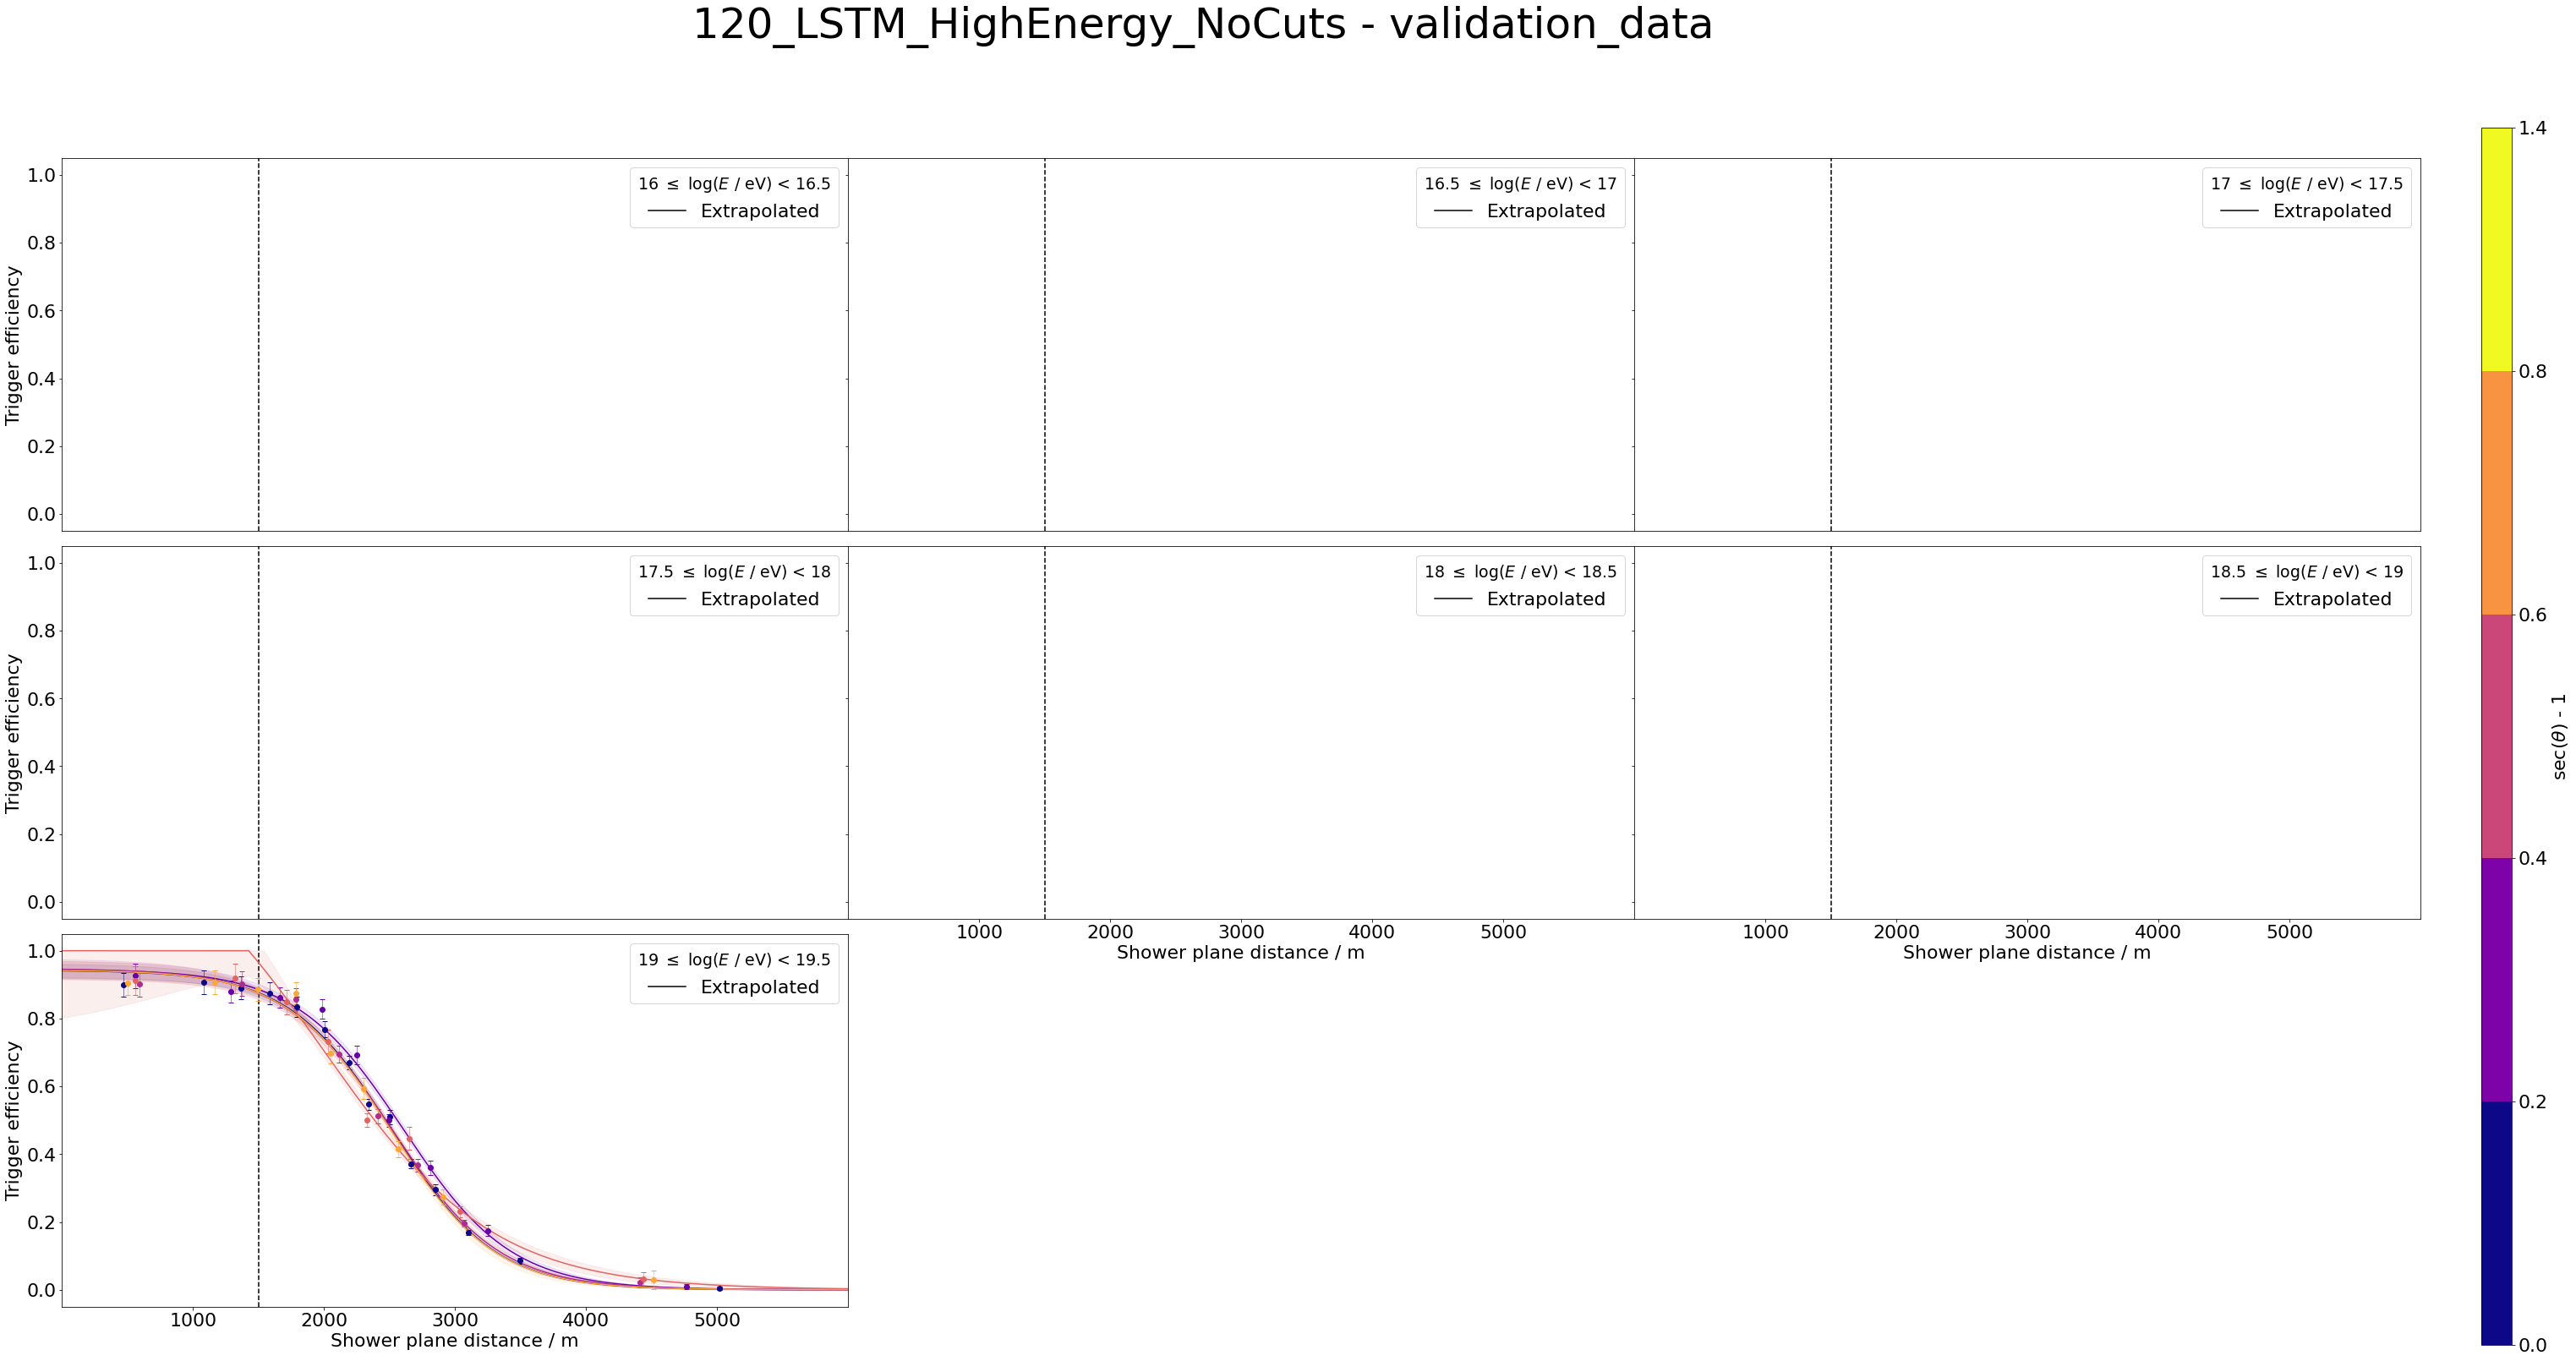

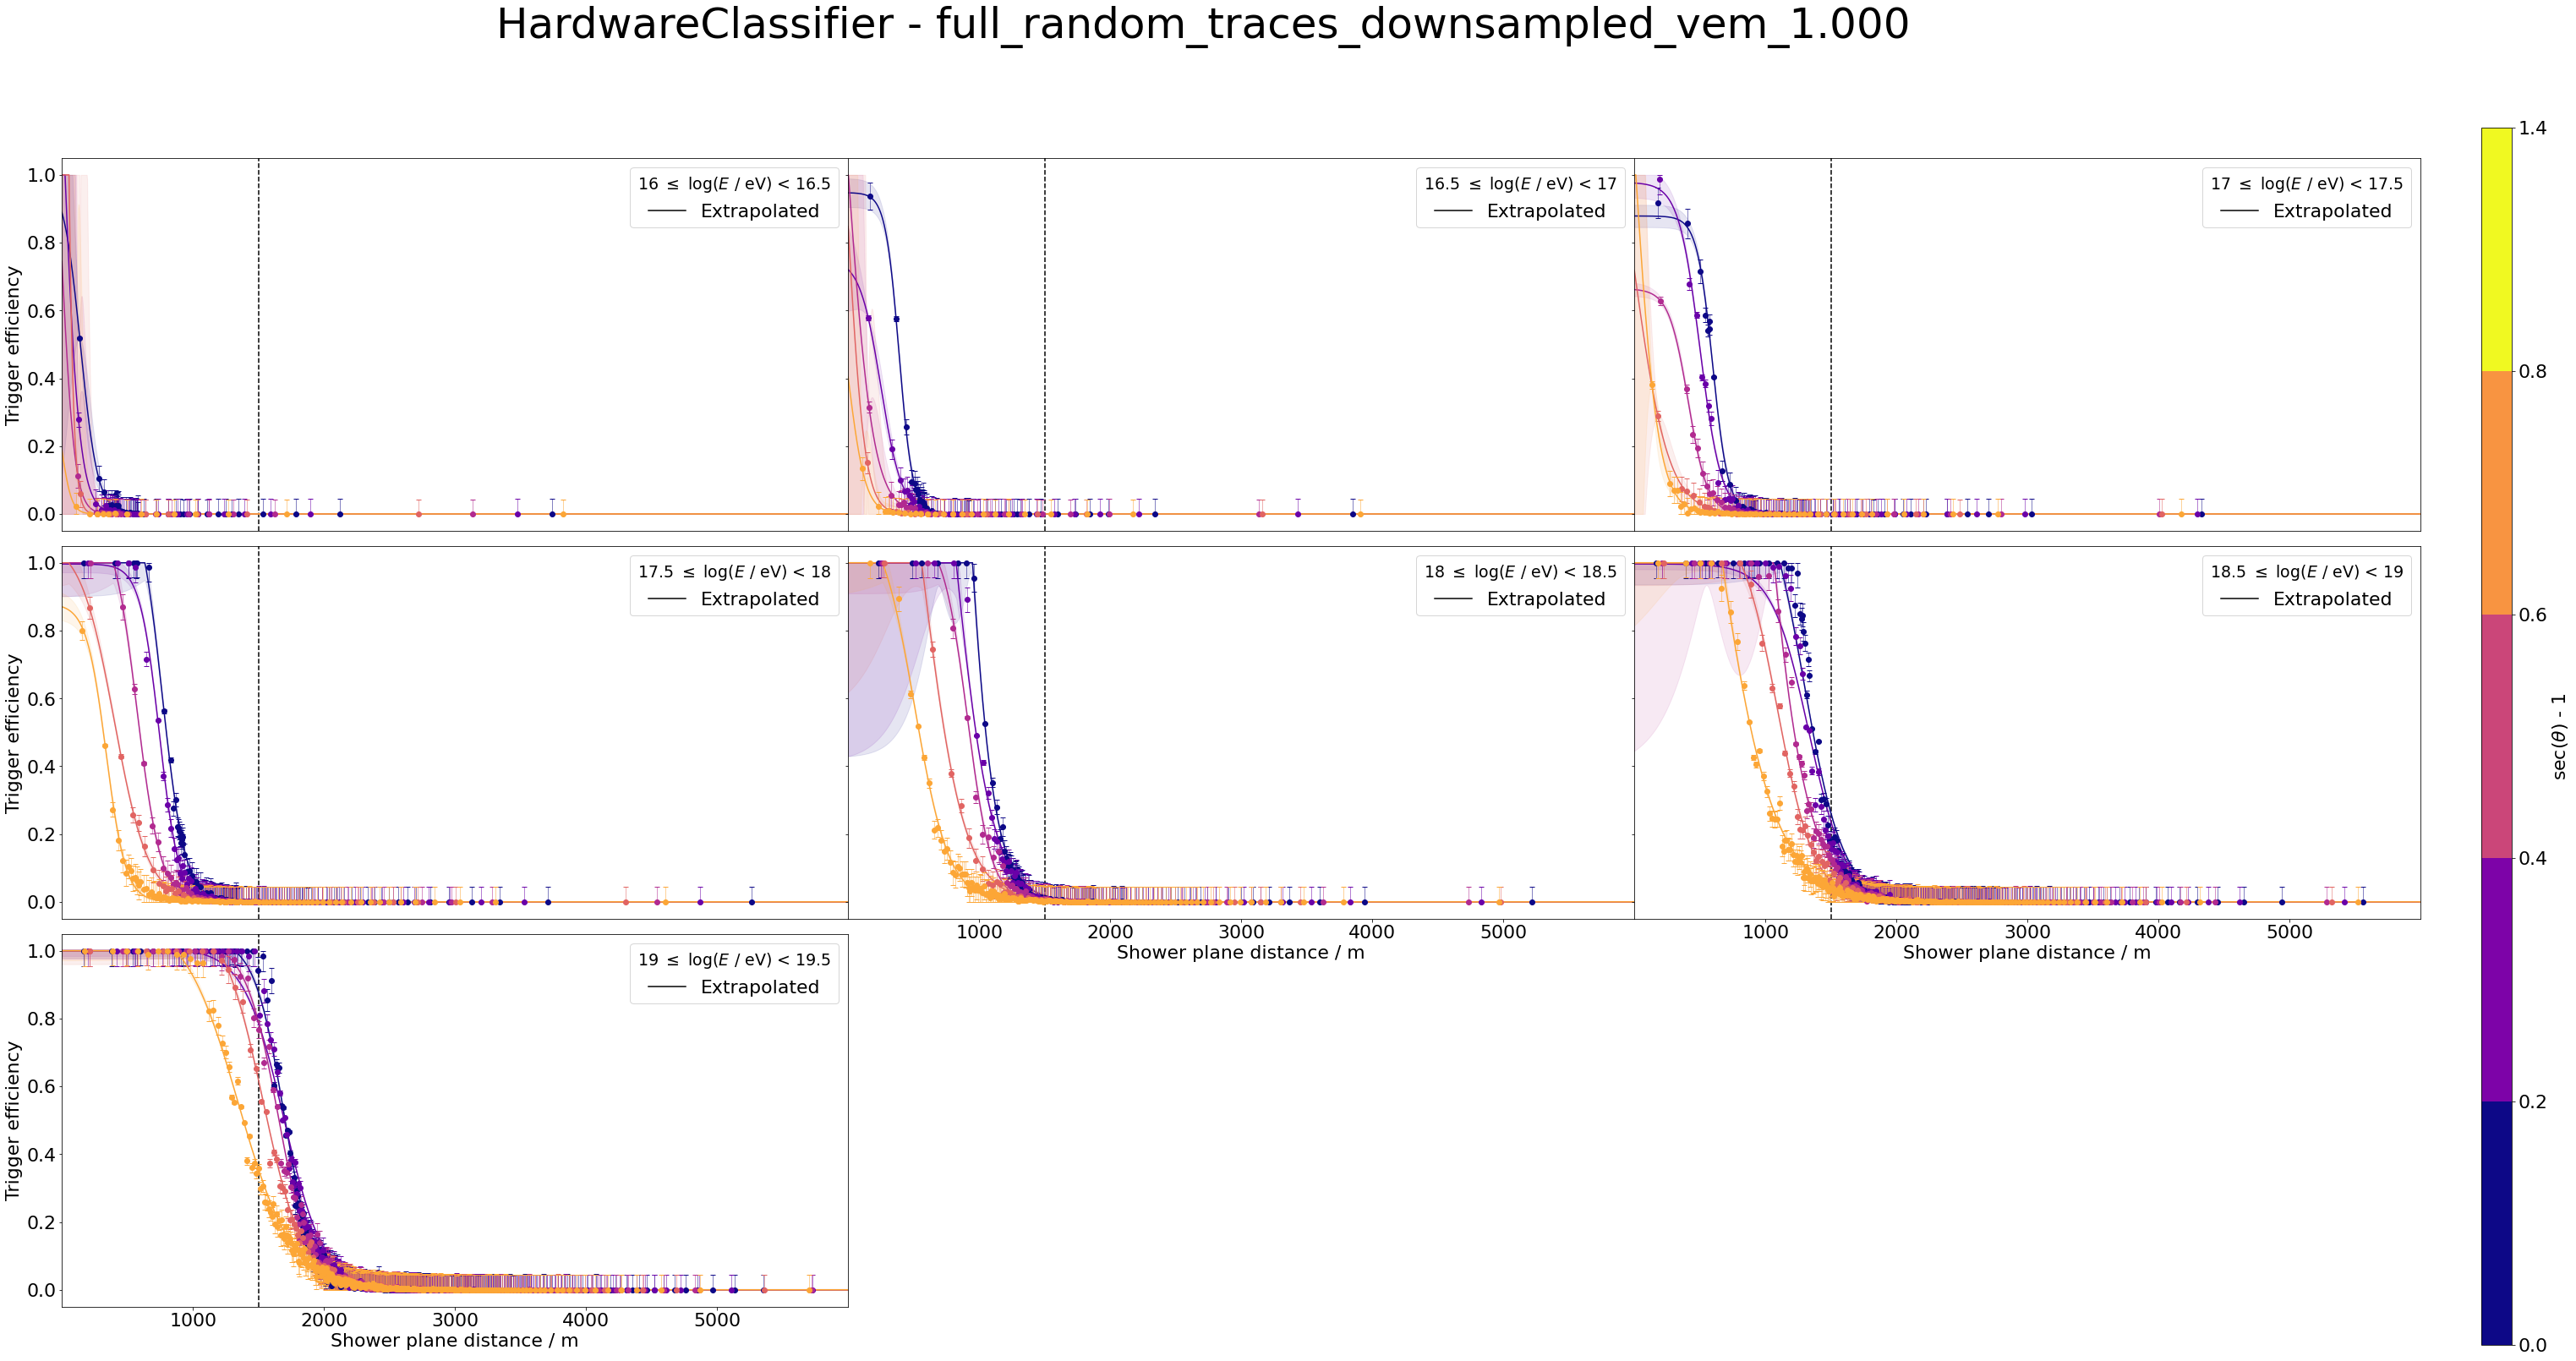

In [1]:
from Binaries import *

LSTM = NNClassifier("120_LSTM_HighEnergy_NoCuts", supress_print = True)
LSTM.spd_energy_efficiency("validation_data")

Hardware = HardwareClassifier()
Hardware.spd_energy_efficiency("full_random_traces_downsampled_vem_1.000")

In [ ]:
Assifier = NNClassifier("120_OneLayer_FullBandwidth_2VEM", supress_print = True)
Assifier.spd_energy_efficiency("validation_data_no_cuts", perform_fit = False)

In [ ]:
Assifier = NNClassifier("120_OneLayer_FullBandwidth_1Particle", supress_print = True)
Assifier.spd_energy_efficiency("validation_data_no_cuts", perform_fit = False)

In [ ]:
Assifier = NNClassifier("120_OneLayer_HighEnergy_1Muon", supress_print = True)
Assifier.spd_energy_efficiency("all_energies", perform_fit = False)

In [ ]:
Assifier = NNClassifier("120_OneLayer_FullBandwidth_NoCuts", supress_print = True)
Assifier.spd_energy_efficiency("validation_data", perform_fit = False)